In [1]:
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
import cv2
from sklearn.utils import shuffle

from IPython.display import clear_output, display
import os.path
from os import path
import shutil
import PIL
from pathlib import Path
from matplotlib import pyplot as plt

from IPython.display import clear_output

import numpy as np

from PIL import ImageFont
from PIL import Image, ImageDraw
from PIL import ImageColor

from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

import random

import time
import shutil
import uuid
from shutil import copyfile
from collections import Counter

import json

from scipy.ndimage.filters import gaussian_filter1d
from matplotlib.pyplot import figure

In [2]:
def read_all(paths):
    lines=[]
    for path in paths:
        print( 'reading ', path)
        with open(path) as f:
            lines.extend( f.readlines())
    return lines

In [3]:
def get_for_unico():
    folder = 'C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log' 
    lines = read_all( [
        os.path.join( folder, 'train_comparativo_20211106_curriculum_unico_---8linhas-curriculum--unico--5k.txt'),
    ])
    logs = [json.loads( line) for line in lines]
    train_loss = [log['train_loss'] for log in logs]
    valid_loss = [log['valid_loss'] for log in logs]
    train_acc = [log['train_acc'] for log in logs]
    valid_acc = [log['valid_acc'] for log in logs]
    test_acc = [log['test_acc'][0][0][-1] for log in logs]
    
    return train_loss, valid_loss, test_acc, train_acc, valid_acc
currUnico_train_loss, currUnico_valid_loss, currUnico_test_acc, currUnico_train_acc, currUnico_valid_acc= get_for_unico()

reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_curriculum_unico_---8linhas-curriculum--unico--5k.txt


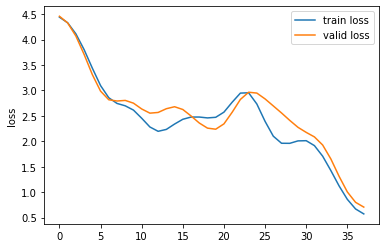

In [4]:
plt.plot(gaussian_filter1d(currUnico_train_loss, sigma=2))
plt.plot(gaussian_filter1d(currUnico_valid_loss, sigma=2))

plt.ylabel('loss')
plt.gca().legend(('train loss','valid loss'))
plt.show()

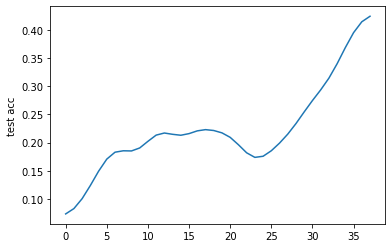

In [5]:
plt.plot(gaussian_filter1d(currUnico_test_acc, sigma=2))

plt.ylabel('test acc')
plt.show()

In [6]:
def get_for_curriculum():
    folder = 'C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log' 
    lines = read_all( [
        os.path.join( folder, 'train_comparativo_20211106_curriculum_4_--curriculum-8-linhas--etapa-1.txt'),
        os.path.join( folder, 'train_comparativo_20211106_curriculum_4_--curriculum-8-linhas--etapa-2.txt'),
        os.path.join( folder, 'train_comparativo_20211106_curriculum_4_--curriculum-8-linhas--etapa-3.txt'),
        os.path.join( folder, 'train_comparativo_20211106_curriculum_4_--curriculum-8-linhas--etapa-4.txt'),
        os.path.join( folder, 'train_comparativo_20211106_curriculum_4_--curriculum-8-linhas--etapa-5.txt'),
    ])
    logs = [json.loads( line) for line in lines]
    train_loss = [log['train_loss'] for log in logs]
    valid_loss = [log['valid_loss'] for log in logs]
    train_acc = [log['train_acc'] for log in logs]
    valid_acc = [log['valid_acc'] for log in logs]
    test_acc = [log['test_acc'][0][0][-1] for log in logs]
    
    return train_loss, valid_loss, test_acc, train_acc, valid_acc

In [7]:
curr_train_loss, curr_valid_loss, curr_test_acc, curr_train_acc, curr_valid_acc= get_for_curriculum()

reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_curriculum_4_--curriculum-8-linhas--etapa-1.txt
reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_curriculum_4_--curriculum-8-linhas--etapa-2.txt
reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_curriculum_4_--curriculum-8-linhas--etapa-3.txt
reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_curriculum_4_--curriculum-8-linhas--etapa-4.txt
reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_curriculum_4_--curriculum-8-linhas--etapa-5.txt


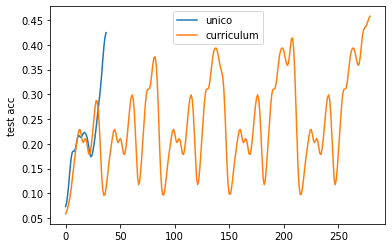

In [8]:
# plt.plot(test_acc)
plt.plot(gaussian_filter1d(currUnico_test_acc, sigma=2))
plt.plot(gaussian_filter1d(curr_test_acc, sigma=2))

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('test acc')
plt.gca().legend(('unico', 'curriculum'))
plt.show()

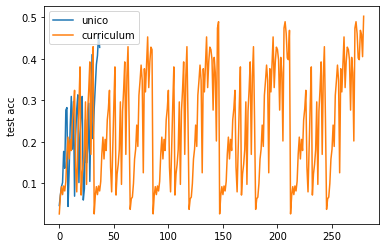

In [9]:
# plt.plot(test_acc)
plt.plot(currUnico_test_acc)
plt.plot(curr_test_acc)

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('test acc')
plt.gca().legend(('unico', 'curriculum'))
plt.show()

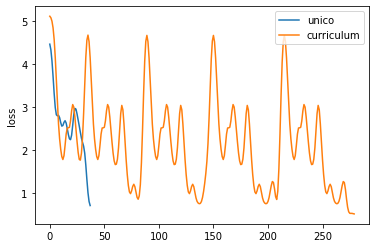

In [10]:
# plt.plot(train_loss)
# plt.plot(gaussian_filter1d(train_loss, sigma=2))
plt.plot(gaussian_filter1d(currUnico_valid_loss, sigma=2))
# plt.plot(gaussian_filter1d(curr_train_loss, sigma=2))
plt.plot(gaussian_filter1d(curr_valid_loss, sigma=2))

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('loss')
plt.gca().legend(('unico', 'curriculum'))
# plt.gca().legend(('train loss','valid loss', 'train loss(curr)','valid loss(curr)'))
plt.show()

In [11]:
def get_for_handwritten():
    folder = 'C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log' 
    lines = read_all( [
        os.path.join( folder, 'train_comparativo_20211106_handwritten_---8linhas-handwritten--5k.txt'),
    ])
    logs = [json.loads( line) for line in lines]
    train_loss = [log['train_loss'] for log in logs]
    valid_loss = [log['valid_loss'] for log in logs]
    train_acc = [log['train_acc'] for log in logs]
    valid_acc = [log['valid_acc'] for log in logs]
    test_acc = [log['test_acc'][0][0][-1] for log in logs]
    
    return train_loss, valid_loss, test_acc, train_acc, valid_acc
hand_train_loss, hand_valid_loss, hand_test_acc, hand_train_acc, hand_valid_acc= get_for_handwritten()

reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_handwritten_---8linhas-handwritten--5k.txt


In [12]:
def get_for_handwrittenCont1():
    folder = 'C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log' 
    lines = read_all( [
        os.path.join( folder, 'train_comparativo_20211106_handwritten_---8linhas-handwritten--5k.txt'),
        os.path.join( folder, 'train_comparativo_20211106_handwritten_5k_cont-1_---8linhas-handwritten--5k.txt'),
    ])
    logs = [json.loads( line) for line in lines]
    train_loss = [log['train_loss'] for log in logs]
    valid_loss = [log['valid_loss'] for log in logs]
    train_acc = [log['train_acc'] for log in logs]
    valid_acc = [log['valid_acc'] for log in logs]
    test_acc = [log['test_acc'][0][0][-1] for log in logs]
    
    return train_loss, valid_loss, test_acc, train_acc, valid_acc
handCont1_train_loss, handCont1_valid_loss, handCont1_test_acc, handCont1_train_acc, handCont1_valid_acc= get_for_handwrittenCont1()

reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_handwritten_---8linhas-handwritten--5k.txt
reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_handwritten_5k_cont-1_---8linhas-handwritten--5k.txt


In [13]:
def get_for_handwritten_2388():
    folder = 'C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log' 
    lines = read_all( [
        os.path.join( folder, 'train_comparativo_20211106_handwritten_only_2388_---8linhas-handwritten-only-2388.txt'),
    ])
    logs = [json.loads( line) for line in lines]
    train_loss = [log['train_loss'] for log in logs]
    valid_loss = [log['valid_loss'] for log in logs]
    train_acc = [log['train_acc'] for log in logs]
    valid_acc = [log['valid_acc'] for log in logs]
    test_acc = [log['test_acc'][0][0][-1] for log in logs]
    
    return train_loss, valid_loss, test_acc, train_acc, valid_acc
hand2388_train_loss, hand2388_valid_loss, hand2388_test_acc, hand2388_train_acc, hand2388_valid_acc= get_for_handwritten_2388()

reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_handwritten_only_2388_---8linhas-handwritten-only-2388.txt


In [14]:
def get_for_handwritten_teacher():
    folder = 'C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log' 
    lines = read_all( [
        os.path.join( folder, 'train_comparativo_20211106_handwritten_teacher_---8linhas-handwritten--5k.txt'),
#         os.path.join( folder, 'train_comparativo_20211106_handwritten_teacher_2_---8linhas-handwritten--5k.txt'),
        
    ])
    logs = [json.loads( line) for line in lines]
    train_loss = [log['train_loss'] for log in logs]
    valid_loss = [log['valid_loss'] for log in logs]
    train_acc = [log['train_acc'] for log in logs]
    valid_acc = [log['valid_acc'] for log in logs]
    test_acc = [log['test_acc'][0][0][-1] for log in logs]
    
    return train_loss, valid_loss, test_acc, train_acc, valid_acc
handTeach_train_loss, handTeach_valid_loss, handTeach_test_acc, handTeach_train_acc, handTeach_valid_acc= get_for_handwritten_teacher()

reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_handwritten_teacher_---8linhas-handwritten--5k.txt


In [15]:
def get_for_handwritten_teacher10k():
    folder = 'C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log' 
    lines = read_all( [
        os.path.join( folder, 'train_comparativo_20211106_handwritten_teacher_---8linhas-handwritten--5k.txt'),
        os.path.join( folder, 'train_comparativo_20211106_handwritten_teacher_10k_---8linhas-handwritten--10k.txt'),
        
    ])
    logs = [json.loads( line) for line in lines]
    train_loss = [log['train_loss'] for log in logs]
    valid_loss = [log['valid_loss'] for log in logs]
    train_acc = [log['train_acc'] for log in logs]
    valid_acc = [log['valid_acc'] for log in logs]
    test_acc = [log['test_acc'][0][0][-1] for log in logs]
    
    return train_loss, valid_loss, test_acc, train_acc, valid_acc
handTeach10_train_loss, handTeach10_valid_loss, handTeach10_test_acc, handTeach10_train_acc, handTeach10_valid_acc= get_for_handwritten_teacher10k()

reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_handwritten_teacher_---8linhas-handwritten--5k.txt
reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_handwritten_teacher_10k_---8linhas-handwritten--10k.txt


In [16]:
def get_for_handwritten_teacher_5k_tam_menor():
    folder = 'C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log' 
    lines = read_all( [
        os.path.join( folder, 'train_comparativo_20211106_handwritten_teacher_tam_menor---8linhas-handwritten--5k.txt'),
    ])
    logs = [json.loads( line) for line in lines]
    train_loss = [log['train_loss'] for log in logs]
    valid_loss = [log['valid_loss'] for log in logs]
    train_acc = [log['train_acc'] for log in logs]
    valid_acc = [log['valid_acc'] for log in logs]
    test_acc = [log['test_acc'][0][0][-1] for log in logs]
    
    return train_loss, valid_loss, test_acc, train_acc, valid_acc
handMenorTeach_train_loss, handMenorTeach_valid_loss, handMenorTeach_test_acc, handMenorTeach_train_acc, handMenorTeach_valid_acc= get_for_handwritten_teacher_5k_tam_menor()

reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_handwritten_teacher_tam_menor---8linhas-handwritten--5k.txt


In [17]:
def get_for_handwritten_5k_tam_menor():
    folder = 'C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log' 
    lines = read_all( [
        os.path.join( folder, 'train_comparativo_20211106_handwritten_tam_menor_---8linhas-handwritten--5k.txt'),
    ])
    logs = [json.loads( line) for line in lines]
    train_loss = [log['train_loss'] for log in logs]
    valid_loss = [log['valid_loss'] for log in logs]
    train_acc = [log['train_acc'] for log in logs]
    valid_acc = [log['valid_acc'] for log in logs]
    test_acc = [log['test_acc'][0][0][-1] for log in logs]
    
    return train_loss, valid_loss, test_acc, train_acc, valid_acc
handMenor_train_loss, handMenor_valid_loss, handMenor_test_acc, handMenor_train_acc, handMenor_valid_acc= get_for_handwritten_5k_tam_menor()

reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_handwritten_tam_menor_---8linhas-handwritten--5k.txt


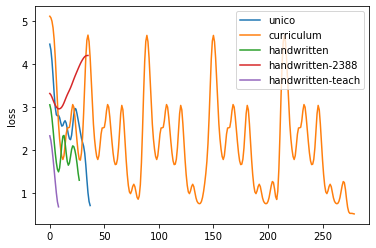

In [18]:
plt.plot(gaussian_filter1d(currUnico_valid_loss, sigma=2))
plt.plot(gaussian_filter1d(curr_valid_loss, sigma=2))
plt.plot(gaussian_filter1d(hand_valid_loss, sigma=2))
plt.plot(gaussian_filter1d(hand2388_valid_loss, sigma=2))
plt.plot(gaussian_filter1d(handTeach_valid_loss, sigma=2))

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('loss')
plt.gca().legend(('unico', 'curriculum', 'handwritten', 'handwritten-2388', 'handwritten-teach'))
plt.show()

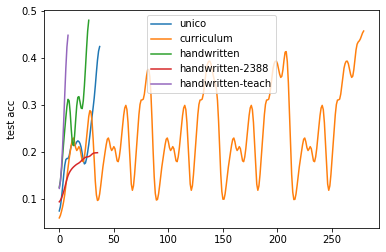

In [19]:
# plt.plot(test_acc)
plt.plot(gaussian_filter1d(currUnico_test_acc, sigma=2))
plt.plot(gaussian_filter1d(curr_test_acc, sigma=2))
plt.plot(gaussian_filter1d(hand_test_acc, sigma=2))
plt.plot(gaussian_filter1d(hand2388_test_acc, sigma=2))
plt.plot(gaussian_filter1d(handTeach_test_acc, sigma=2))

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('test acc')
plt.gca().legend(('unico', 'curriculum', 'handwritten', 'handwritten-2388', 'handwritten-teach'))
plt.show()

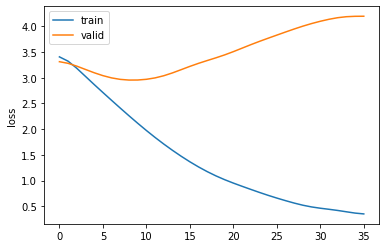

In [20]:
# plt.plot(test_acc)
plt.plot(gaussian_filter1d(hand2388_train_loss, sigma=2))
plt.plot(gaussian_filter1d(hand2388_valid_loss, sigma=2))

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('loss')
plt.gca().legend(('train', 'valid'))
plt.show()

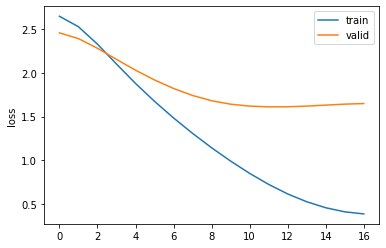

In [21]:
# plt.plot(test_acc)
plt.plot(gaussian_filter1d(handMenorTeach_train_loss, sigma=2))
plt.plot(gaussian_filter1d(handMenorTeach_valid_loss, sigma=2))

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('loss')
plt.gca().legend(('train', 'valid'))
plt.show()

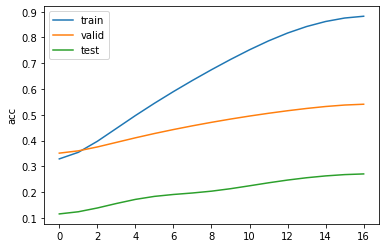

In [22]:
# plt.plot(test_acc)
plt.plot(gaussian_filter1d(handMenorTeach_train_acc, sigma=2))
plt.plot(gaussian_filter1d(handMenorTeach_valid_acc, sigma=2))
plt.plot(gaussian_filter1d(handMenorTeach_test_acc, sigma=2))

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('acc')
plt.gca().legend(('train', 'valid', 'test'))
plt.show()

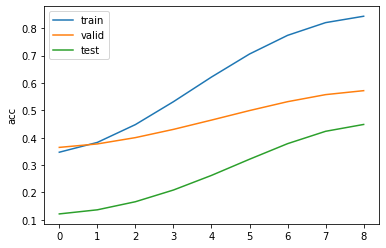

In [23]:
# plt.plot(test_acc)
plt.plot(gaussian_filter1d(handTeach_train_acc, sigma=2))
plt.plot(gaussian_filter1d(handTeach_valid_acc, sigma=2))
plt.plot(gaussian_filter1d(handTeach_test_acc, sigma=2))

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('acc')
plt.gca().legend(('train', 'valid', 'test'))
plt.show()

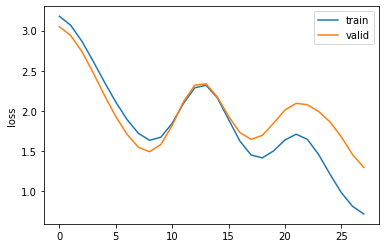

In [24]:
# plt.plot(test_acc)
plt.plot(gaussian_filter1d(hand_train_loss, sigma=2))
plt.plot(gaussian_filter1d(hand_valid_loss, sigma=2))

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('loss')
plt.gca().legend(('train', 'valid'))
plt.show()

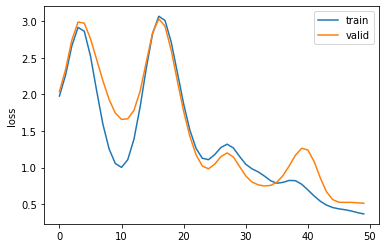

In [25]:
# plt.plot(test_acc)
plt.plot(gaussian_filter1d(curr_train_loss[-50:], sigma=2))
plt.plot(gaussian_filter1d(curr_valid_loss[-50:], sigma=2))

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('loss')
plt.gca().legend(('train', 'valid'))
plt.show()

In [26]:
def get_for_curriculum6():
    folder = 'C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log' 
    lines = read_all( [
        os.path.join( folder, 'train_comparativo_20211106_curriculum_4_--curriculum-8-linhas--etapa-1.txt'),
        os.path.join( folder, 'train_comparativo_20211106_curriculum_4_--curriculum-8-linhas--etapa-2.txt'),
        os.path.join( folder, 'train_comparativo_20211106_curriculum_4_--curriculum-8-linhas--etapa-3.txt'),
        os.path.join( folder, 'train_comparativo_20211106_curriculum_4_--curriculum-8-linhas--etapa-4.txt'),
        os.path.join( folder, 'train_comparativo_20211106_curriculum_4_--curriculum-8-linhas--etapa-5.txt'),
        os.path.join( folder, 'train_comparativo_20211106_curriculum_4_etapa_6_--curriculum-8-linhas--etapa-6-5500.txt'),
    ])
    logs = [json.loads( line) for line in lines]
    train_loss = [log['train_loss'] for log in logs]
    valid_loss = [log['valid_loss'] for log in logs]
    train_acc = [log['train_acc'] for log in logs]
    valid_acc = [log['valid_acc'] for log in logs]
    test_acc = [log['test_acc'][0][0][-1] for log in logs]
    
    return train_loss, valid_loss, test_acc, train_acc, valid_acc
	
curr6_train_loss, curr6_valid_loss, curr6_test_acc, curr6_train_acc, curr6_valid_acc= get_for_curriculum6()

reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_curriculum_4_--curriculum-8-linhas--etapa-1.txt
reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_curriculum_4_--curriculum-8-linhas--etapa-2.txt
reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_curriculum_4_--curriculum-8-linhas--etapa-3.txt
reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_curriculum_4_--curriculum-8-linhas--etapa-4.txt
reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_curriculum_4_--curriculum-8-linhas--etapa-5.txt
reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_2

In [27]:
def get_for_parts1500_2388():
    folder = 'C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log' 
    lines = read_all( [
        os.path.join( folder, 'train_comparativo_20211106_random_parts1500_2388_--dataset-v022-7k-shuffle-parts1500.txt'),
    ])
    logs = [json.loads( line) for line in lines]
    train_loss = [log['train_loss'] for log in logs]
    valid_loss = [log['valid_loss'] for log in logs]
    train_acc = [log['train_acc'] for log in logs]
    valid_acc = [log['valid_acc'] for log in logs]
    test_acc = [log['test_acc'][0][0][-1] for log in logs]
    
    return train_loss, valid_loss, test_acc, train_acc, valid_acc
	
parts1500_2388_train_loss, parts1500_2388_valid_loss, parts1500_2388_test_acc, parts1500_2388_train_acc, parts1500_2388_valid_acc= get_for_parts1500_2388()

reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_random_parts1500_2388_--dataset-v022-7k-shuffle-parts1500.txt


In [28]:
print( curr_test_acc[-1], curr6_test_acc[-1], hand2388_test_acc[-1], curr6_test_acc[-1])

0.5027412176132202 0.5422149300575256 0.20285087823867798 0.5422149300575256


In [29]:
print( "sequencial teach 10k", handTeach10_test_acc[-1])
print( "sequencial teach", handTeach_test_acc[-1])
print( "sequencial teach Tam menor", handMenorTeach_test_acc[-1])

print( "sequencial-2388", hand2388_test_acc[-1])
print( "sequencial-cont", handCont1_test_acc[-1])
print( "sequencial", hand_test_acc[-1])
print( "sequencial tam menor", handMenor_test_acc[-1])

print( "curriculum unico", currUnico_test_acc[-1])

print( "curriculum etapas-6", curr6_test_acc[-1])
print( "curriculum etapas", curr_test_acc[-1])

print( "random parts150 2388", parts1500_2388_test_acc[-1])

sequencial teach 10k 0.6578947305679321
sequencial teach 0.515350878238678
sequencial teach Tam menor 0.27905702590942383
sequencial-2388 0.20285087823867798
sequencial-cont 0.6162280440330505
sequencial 0.5773026347160339
sequencial tam menor 0.3037280738353729
curriculum unico 0.42763158679008484
curriculum etapas-6 0.5422149300575256
curriculum etapas 0.5027412176132202
random parts150 2388 0.3163377046585083


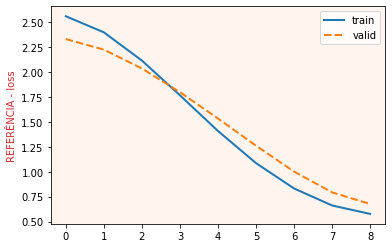

In [95]:
#
# sem teacher
#
plt.plot(gaussian_filter1d(handTeach_train_loss, sigma=2), color='tab:blue', linewidth=2)
plt.plot(gaussian_filter1d(handTeach_valid_loss, sigma=2), color='tab:orange', linestyle='dashed', linewidth=2)
plt.ylabel('REFERÊNCIA - loss', color='tab:red')
plt.gca().set_facecolor('seashell')
plt.gca().legend((
    'train', 
    'valid', 
))
plt.show()


In [122]:
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt

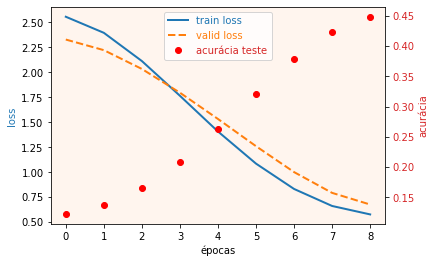

In [136]:
host = host_subplot(111)

par = host.twinx()

# eixo 1
host.set_xlabel("épocas")
host.set_ylabel("loss")
host.yaxis.get_label().set_color(color='tab:blue')

# eixo 2
par.set_ylabel("acurácia")
par.tick_params(axis='y', labelcolor=color)
par.yaxis.get_label().set_color(color='tab:red')

# graficos
host.plot(gaussian_filter1d(handTeach_train_loss, sigma=2), color='tab:blue', linewidth=2, label="train loss")
host.plot(gaussian_filter1d(handTeach_valid_loss, sigma=2), color='tab:orange', linestyle='dashed', linewidth=2, label="valid loss")
par.plot(gaussian_filter1d(handTeach_test_acc, sigma=2), 'ro', label='acurácia teste')

# legendas
leg = plt.legend( loc='upper center')
leg.texts[0].set_color(color='tab:blue')
leg.texts[1].set_color(color='tab:orange')
leg.texts[2].set_color(color='tab:red')

plt.gca().set_facecolor('seashell')

plt.show()


### Alinhamento

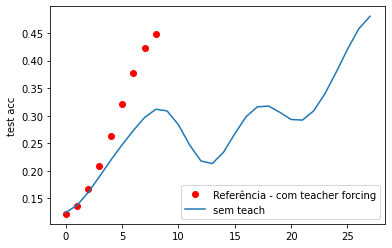

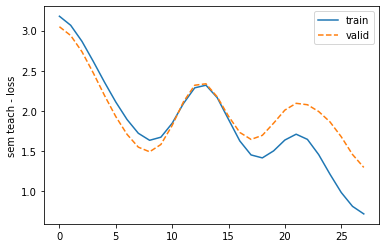

In [76]:
# 
# Figuas para 'previsibilidade'
#
# teste acc
#
plt.plot(gaussian_filter1d(handTeach_test_acc, sigma=2), 'ro')
plt.plot(gaussian_filter1d(hand_test_acc, sigma=2))
plt.ylabel('test acc')
plt.gca().legend((
    'Referência - com teacher forcing', 
    'sem teach', 
))
plt.show()

#
# sem teacher
#
plt.plot(gaussian_filter1d(hand_train_loss, sigma=2))
plt.plot(gaussian_filter1d(hand_valid_loss, sigma=2), linestyle='dashed')
plt.ylabel('sem teach - loss')
plt.gca().legend((
    'train', 
    'valid', 
))
plt.show()


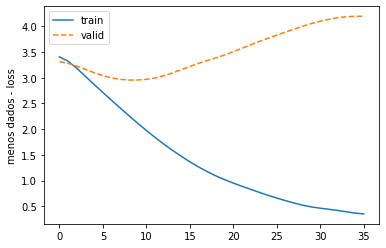

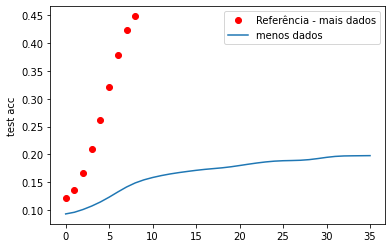

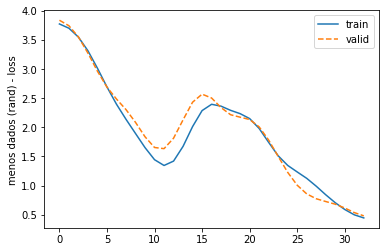

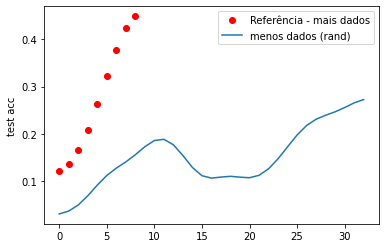

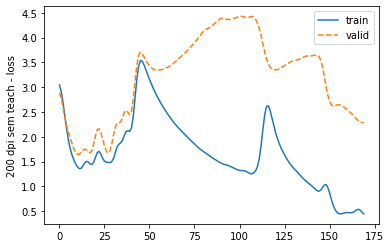

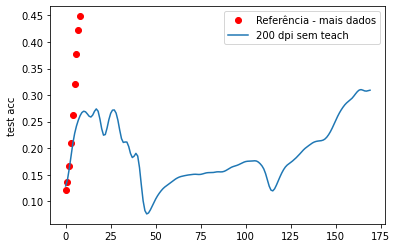

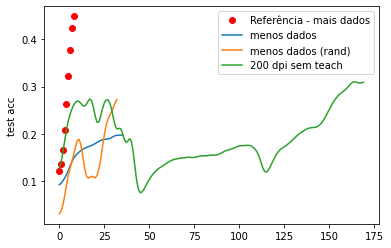

In [96]:
#
#  Alinhamento
#
# 

#
# teste acc
#
plt.plot(gaussian_filter1d(hand2388_train_loss, sigma=2))
plt.plot(gaussian_filter1d(hand2388_valid_loss, sigma=2), linestyle='dashed')
plt.ylabel('menos dados - loss')
plt.gca().legend((
    'train', 
    'valid', 
))
plt.show()


plt.plot(gaussian_filter1d(handTeach_test_acc, sigma=2), 'ro')
plt.plot(gaussian_filter1d(hand2388_test_acc, sigma=2))
plt.ylabel('test acc')
plt.gca().legend((
    'Referência - mais dados', 
    'menos dados', 
))
plt.show()

## -----------------

plt.plot(gaussian_filter1d(parts1500_2388_train_loss, sigma=2))
plt.plot(gaussian_filter1d(parts1500_2388_valid_loss, sigma=2), linestyle='dashed')
plt.ylabel('menos dados (rand) - loss')
plt.gca().legend((
    'train', 
    'valid', 
))
plt.show()

plt.plot(gaussian_filter1d(handTeach_test_acc, sigma=2), 'ro')
plt.plot(gaussian_filter1d(parts1500_2388_test_acc, sigma=2))
plt.ylabel('test acc')
plt.gca().legend((
    'Referência - mais dados', 
    'menos dados (rand)',
))
plt.show()

# -------------
plt.plot(gaussian_filter1d(handMenor_train_loss, sigma=2))
plt.plot(gaussian_filter1d(handMenor_valid_loss, sigma=2), linestyle='dashed')
plt.ylabel('200 dpi sem teach - loss')
plt.gca().legend((
    'train', 
    'valid', 
))
plt.show()


plt.plot(gaussian_filter1d(handTeach_test_acc, sigma=2), 'ro')
plt.plot(gaussian_filter1d(handMenor_test_acc, sigma=2))
plt.ylabel('test acc')
plt.gca().legend((
    'Referência - mais dados', 
    '200 dpi sem teach',
))
plt.show()


plt.plot(gaussian_filter1d(handTeach_test_acc, sigma=2), 'ro', linewidth=2)
plt.plot(gaussian_filter1d(hand2388_test_acc, sigma=2))
plt.plot(gaussian_filter1d(parts1500_2388_test_acc, sigma=2))
plt.plot(gaussian_filter1d(handMenor_test_acc, sigma=2))
plt.ylabel('test acc')
plt.gca().legend((
    'Referência - mais dados', 
    'menos dados', 
    'menos dados (rand)',
    '200 dpi sem teach',
))
plt.show()

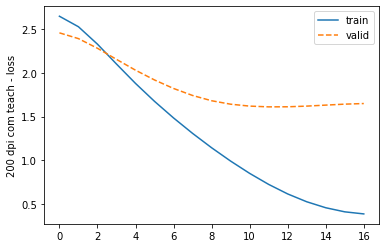

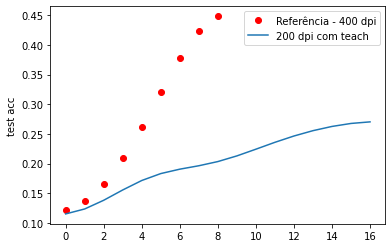

In [82]:
#
#  Reconhecimento
#
# 

#
# teste acc
#

plt.plot(gaussian_filter1d(handMenorTeach_train_loss, sigma=2))
plt.plot(gaussian_filter1d(handMenorTeach_valid_loss, sigma=2), linestyle='dashed')
plt.ylabel('200 dpi com teach - loss')
plt.gca().legend((
    'train', 
    'valid', 
))
plt.show()

plt.plot(gaussian_filter1d(handTeach_test_acc, sigma=2), 'ro')
plt.plot(gaussian_filter1d(handMenorTeach_test_acc, sigma=2))
plt.ylabel('test acc')
plt.gca().legend((
    'Referência - 400 dpi', 
    '200 dpi com teach', 
))
plt.show()




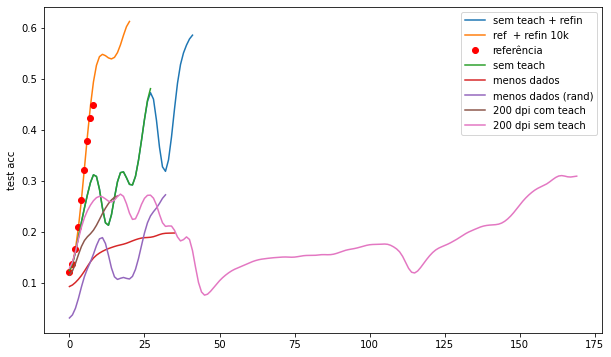

In [79]:
figure(figsize=(10, 6))
plt.plot(gaussian_filter1d(handCont1_test_acc, sigma=2))  # P1 + refinamento
plt.plot(gaussian_filter1d(handTeach10_test_acc, sigma=2)) # Referencia + refinamento (10k)

plt.plot(gaussian_filter1d(handTeach_test_acc, sigma=2), 'ro', linewidth=2)  # Referência
plt.plot(gaussian_filter1d(hand_test_acc, sigma=2)) # P1 - sem teacher forcing

plt.plot(gaussian_filter1d(hand2388_test_acc, sigma=2)) # A1 - menos dados
plt.plot(gaussian_filter1d(parts1500_2388_test_acc, sigma=2))  # A2 - menos dados (randômicos)',

plt.plot(gaussian_filter1d(handMenorTeach_test_acc, sigma=2)) # R1 - 200 dpi com teacher', 
plt.plot(gaussian_filter1d(handMenor_test_acc, sigma=2))  # R2 - 200 dpi sem teacher', 

plt.ylabel('test acc')
plt.gca().legend((
    'sem teach + refin', 
    'ref  + refin 10k', 

    'referência', 
    'sem teach', 
    'menos dados', 
    'menos dados (rand)',
    '200 dpi com teach', 
    '200 dpi sem teach', 
    
))
plt.show()



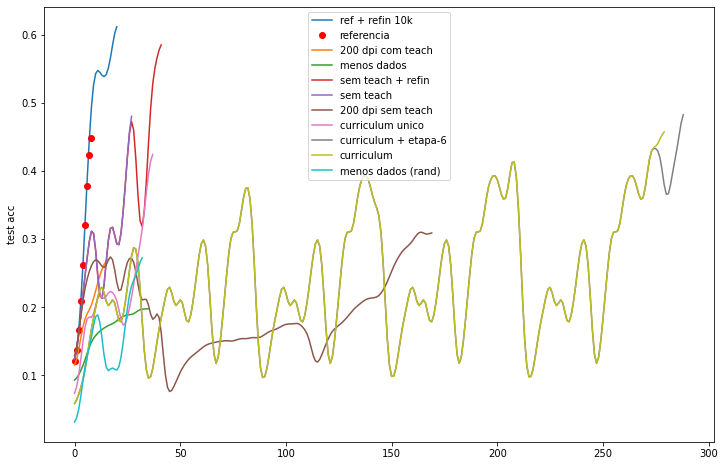

In [80]:
# plt.plot(test_acc)
figure(figsize=(12, 8))

plt.plot(gaussian_filter1d(handTeach10_test_acc, sigma=2))
plt.plot(gaussian_filter1d(handTeach_test_acc, sigma=2), 'ro', linewidth=3)
plt.plot(gaussian_filter1d(handMenorTeach_test_acc, sigma=2))

plt.plot(gaussian_filter1d(hand2388_test_acc, sigma=2))
plt.plot(gaussian_filter1d(handCont1_test_acc, sigma=2))
plt.plot(gaussian_filter1d(hand_test_acc, sigma=2))
plt.plot(gaussian_filter1d(handMenor_test_acc, sigma=2))

plt.plot(gaussian_filter1d(currUnico_test_acc, sigma=2))

plt.plot(gaussian_filter1d(curr6_test_acc, sigma=2))
plt.plot(gaussian_filter1d(curr_test_acc, sigma=2))

plt.plot(gaussian_filter1d(parts1500_2388_test_acc, sigma=2))

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('test acc')
plt.gca().legend((
    'ref + refin 10k',
    'referencia', 
    '200 dpi com teach', 

    'menos dados', 
    'sem teach + refin', 
    'sem teach', 
    '200 dpi sem teach', 

    'curriculum unico', 

    'curriculum + etapa-6', 
    'curriculum', 
    
    'menos dados (rand)', 
))
plt.show()

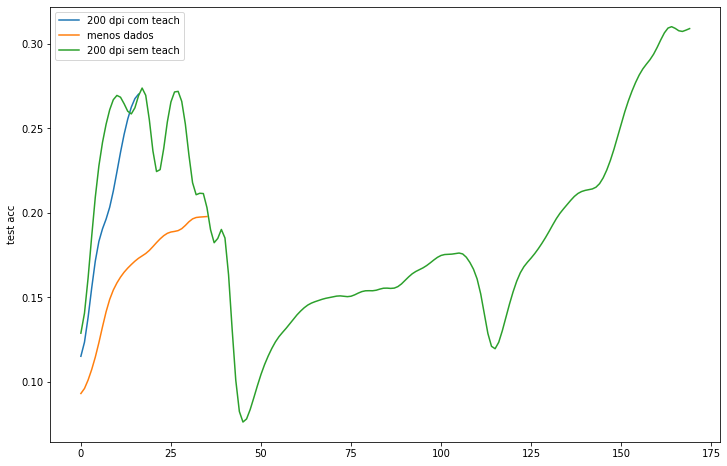

In [36]:
figure(figsize=(12, 8))

plt.plot(gaussian_filter1d(handMenorTeach_test_acc, sigma=2))
plt.plot(gaussian_filter1d(hand2388_test_acc, sigma=2))
plt.plot(gaussian_filter1d(handMenor_test_acc, sigma=2))

plt.ylabel('test acc')
plt.gca().legend((
    '200 dpi com teach', 

    'menos dados', 
    '200 dpi sem teach', 
))
plt.show()